In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objects as go
rnd_seed = 42

In [2]:
# I/O
# Input
train_file = os.path.abspath('data/train.csv')
test_file = os.path.abspath('data/test.csv')

# Output
submission_folder = os.path.abspath('./submissions/')

## Utility functions

In [3]:
# submission_save
def submission_save(preds, test_df, save_folder, identif='PassengerId', target='Survived'):
    numbers = []
    sub = pd.DataFrame({identif : test_df[identif], 
                        target : preds.astype(int)})
    for _, _, filenames in os.walk(save_folder):
        for filename in filenames:
            
            num = filename.split('_')[0]
            numbers.append(int(num))
    
    if not numbers: 
        order = '000'
    else:
        order = str(np.max(numbers) + 1).zfill(3)
    name = order + '_submission.csv'
    sub.to_csv(os.path.join(submission_folder, name), index=False)
    print(f'{name} saved!')
    return None

## Load data

In [4]:
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

# 1. Exploratory Data Analysis

In [5]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

## 1.1. Descriptives

In [10]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

### PClass

In [11]:
train[['Pclass', 'Survived']].groupby(['Pclass'], 
                                     as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

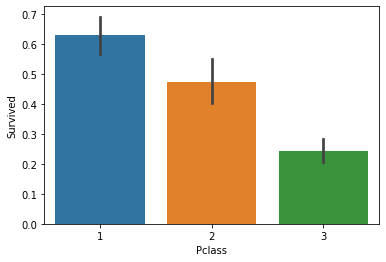

In [12]:
# Pclass vs. Survival rate
sns.barplot(x='Pclass', y='Survived', data=train);

## Sex

In [13]:
# Sex vs. Survival rate
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

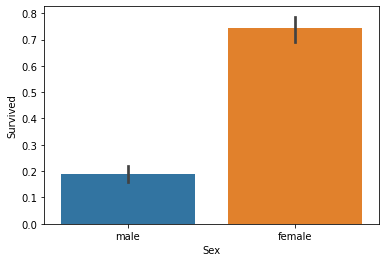

In [14]:
sns.barplot(x='Sex', y='Survived', data=train);

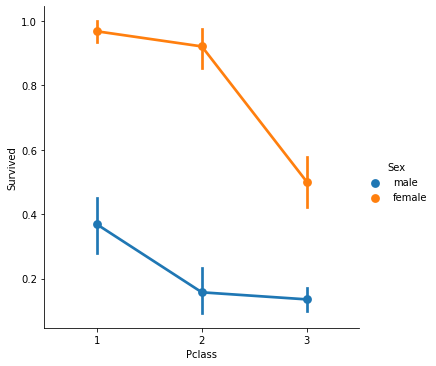

In [15]:
# Pclass vs. Sex vs. Survival rate
m = sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=train); 

## SibSp

In [16]:
# No of siblings and/or spouses vs. Survival rate
train[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False).reset_index(drop=True)

Survived
0  0.535885
1  0.464286
2  0.345395
3  0.250000
4  0.166667
5  0.000000
6  0.000000

## Parch

In [17]:
# No of parents and/or children vs. Survival rate
train[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False).reset_index(drop=True)

Survived
0  0.600000
1  0.550847
2  0.500000
3  0.343658
4  0.200000
5  0.000000
6  0.000000

##  Embarked

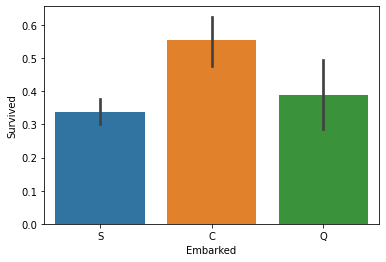

In [7]:
# Port vs. survival rate
sns.barplot(x='Embarked', y='Survived', data=train);

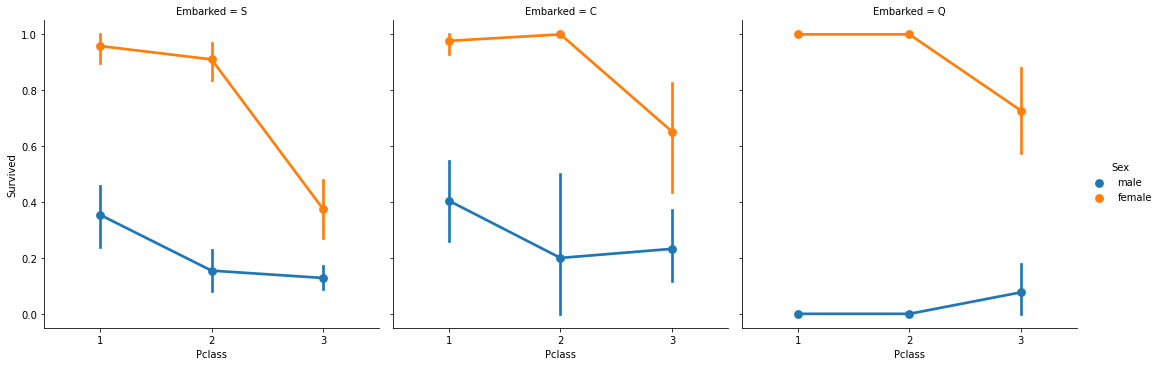

In [8]:
# Pclass vs. Sex. vs. Embarked vs. Survival Rate
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train, kind='point');

## Age

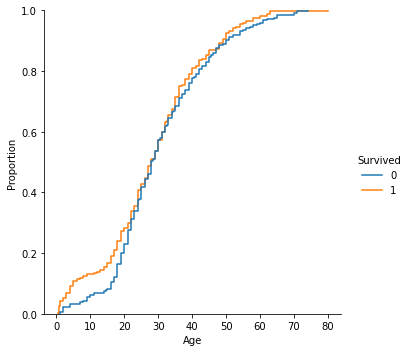

In [9]:
# Age vs. Survival rate ECDF
sns.displot(x='Age', hue="Survived", kind='ecdf', data=train);

We can see a visible disproportion around 20 years - perhaps Titanic passengers tried to save children and adolescents. We will later encapsilate this fact into "is_young" feature.

## Fare

In [10]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

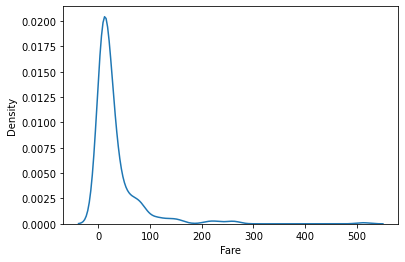

In [11]:
g = sns.kdeplot(train.Fare)

In [12]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

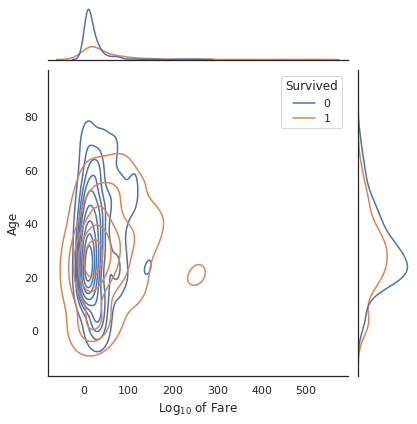

In [13]:
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=train["Fare"], y=train["Age"], hue=train['Survived'], kind='kde')
g.ax_joint.set_xlabel(r'Log$_{10}$ of Fare');

## Sankey (alluvial) diagram

In [14]:
# Creating categorical dimensions
class_dim = go.parcats.Dimension(
    values=train.Pclass,
    categoryorder='category ascending', label="Ticket class"
)

sex_dim = go.parcats.Dimension(values=train.Sex, label="Sex")

survival_dim = go.parcats.Dimension(
    values=train.Survived, label="Outcome", categoryarray=[0, 1],
    ticktext=['died', 'survived']
)

# Adding color
color = train.Survived;
colorscale = [[0, 'gray'], [1, 'blue']];

fig = go.Figure(data = [go.Parcats(dimensions=[survival_dim, sex_dim,  class_dim],
        line={'color': color, 'colorscale': colorscale, 'shape': 'hspline'},
        hoveron='color', hoverinfo='count+probability',
        labelfont={'size': 18},
        tickfont={'size': 16})])

fig.update_layout(title_text="Titanic survival by category - Sankey Diagram", font_size=20)
fig.show()

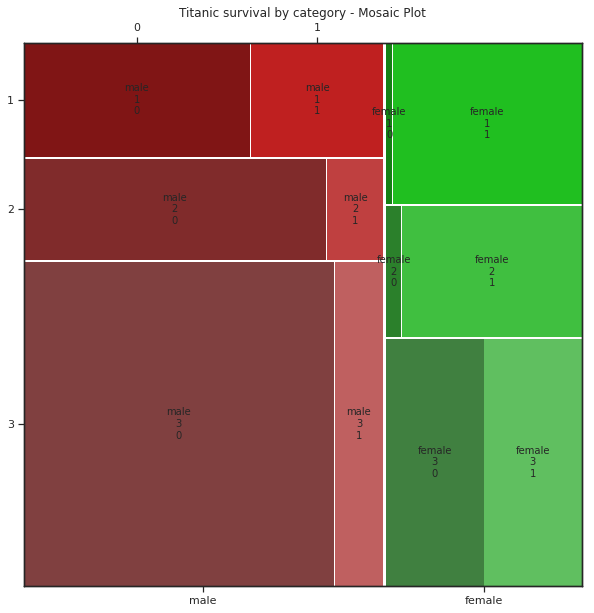

In [15]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

data = train[['Survived', 'Pclass', 'Sex']]
index = pd.MultiIndex.from_tuples(product(train.Survived.unique(), train.Pclass.unique(), train.Sex.unique()))
fig, rects = mosaic(data.sort_values('Pclass', ascending=False), ['Sex', 'Pclass', 'Survived'], 
                   title='Titanic survival by category - Mosaic Plot')
fig.set_size_inches(10, 10)
plt.show()

# 2. Dealing with missing values

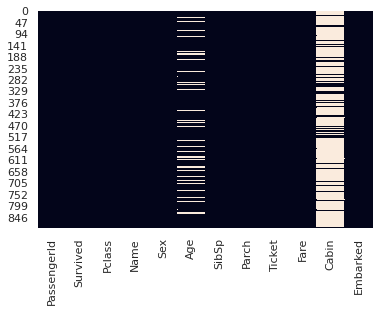

In [16]:
sns.heatmap(train.isnull(), cbar=False); 

In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

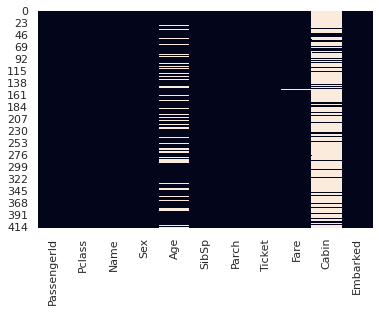

In [18]:
sns.heatmap(test.isnull(), cbar=False);

## 2.1. Fare

First we will impute missing Fare value, as it is an easy task

In [19]:
test[test.Fare.isnull()]

PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S

In [20]:
# Imputing missing Fare value 
test.loc[test.Fare.isnull(), 'Fare'] = train[(train.Pclass == 3) & (train.Sex == 'male')]['Fare'].median()

We see positive skewness of Fare variable distribution. Therefore we will log-tranform it. In the next step we will compare it with most obvious variable - **Ticket Class (Pclass)**.

In [21]:
from scipy.special import xlogy

# Taking log of fare to make data less skewed 
for x in [train, test]:
    x['log_fare'] =  xlogy(np.sign(x['Fare']), x['Fare']) / np.log(10)

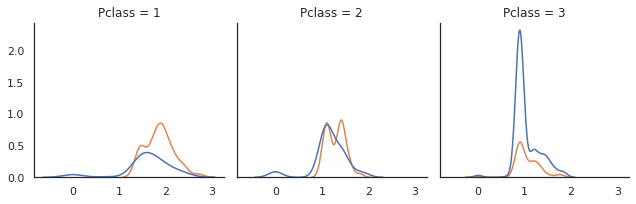

In [22]:
# Fare distribution plot vs. Class
g = sns.FacetGrid(data=train, col='Pclass').map_dataframe(sns.kdeplot, x='log_fare', hue='Survived');

## 2.2. Embarked

In [23]:
train[train.Embarked.isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  log_fare  
61   female  38.0      0      0  113572  80.0   B28      NaN   1.90309  
829  female  62.0      0      0  113572  80.0   B28      NaN   1.90309

In [24]:
mode = train.Embarked[train.Pclass == 1].mode()
train.Embarked = train.Embarked.fillna(mode[0])

## 2.3. Age 

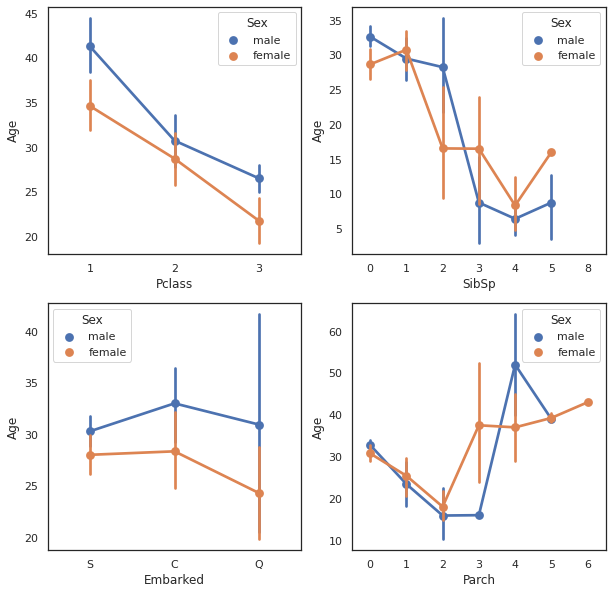

In [25]:
# Checking dependencies from other variables
fig, axes = plt.subplots(2, 2, figsize=(10,10))
sns.pointplot(x='Pclass', y='Age', hue='Sex', data=train, ax=axes[0][0])
sns.pointplot(x='Embarked', y='Age', hue='Sex', data=train, ax=axes[1][0])
sns.pointplot(x='SibSp', y='Age', hue='Sex', data=train, ax=axes[0][1])
sns.pointplot(x='Parch', y='Age', hue='Sex', data=train, ax=axes[1][1]); 

Here we can see dependency of age variable and categorical data.

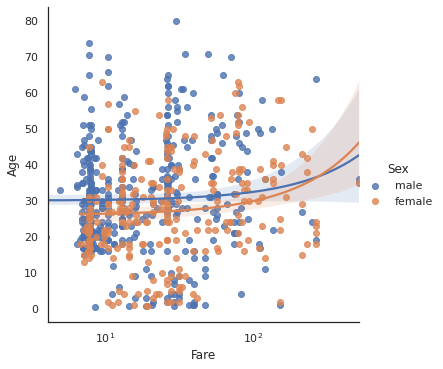

In [26]:
g = sns.lmplot(x='Fare', y='Age', hue='Sex', data=train)
plt.xscale('log')

There is no reationship between Fare and Age. 

### Checking correlation matrix

In [27]:
# Because we need to transform data for correaltion matrix, we will encode Sex variable using

for x in [train, test]:
    x["Sex"] = x["Sex"].map({"male": 0, "female":1})

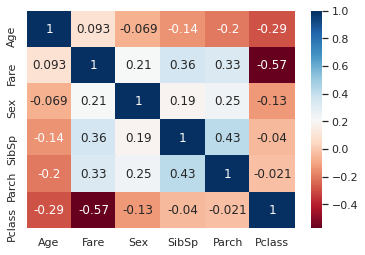

In [28]:
g = sns.heatmap(train[["Age", "Fare", "Sex", "SibSp", "Parch", "Pclass"]].corr("kendall"),cmap = "RdBu", annot=True)

The correlation matrix confirms our previous catplot results - Age is negatively correlated with Pclass and Parch variables. The correlation with Fare and Sex is negligible. First, we'll concatenate our data, because we need to do imputation on both training and testing sets.

In [29]:
data = pd.concat((train, test), sort=False).reset_index(drop=True)

In [30]:
# Using RandomForestRegressor to impute missing values
from sklearn.ensemble import RandomForestRegressor

cols = ['Pclass', 'SibSp', 'Parch']
target = 'Age'

train_rf = train.loc[(train[target].notnull())]  # known age values
test_rf = data[data[target].isnull()]  # all nan age values

y = train_rf[target].values
X = train_rf[cols].values

rfr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)

rfr.fit(X, y)

preds = rfr.predict(test_rf[cols])

data['pred_age'] = data[target]
data.loc[data[target].isnull(), 'pred_age'] = preds

In [31]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
log_fare          0
pred_age          0
dtype: int64

Age     pred_age
count  1046.000000  1309.000000
mean     29.881138    29.663708
std      14.413493    13.268965
min       0.170000     0.170000
25%      21.000000    22.000000
50%      28.000000    28.245868
75%      39.000000    37.000000
max      80.000000    80.000000

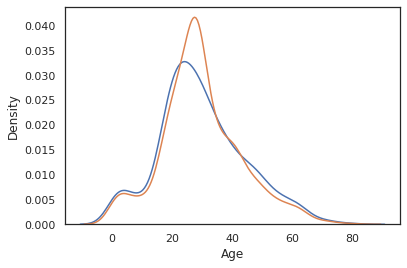

In [32]:
# Sanity check for RFR imputation
display(data[['Age', 'pred_age']].describe())
fig, ax = plt.subplots()
sns.kdeplot(data['Age'], ax=ax)
sns.kdeplot(data['pred_age'], ax=ax)
plt.show()

Our imputation worked, so we are able to drop original Age column from our data.

In [33]:
data = data.drop(columns=['Age'])

# 2. Feature Engineering

We will continue performing feature engineering on our concatenated dataset. 

## 2.1 Name 

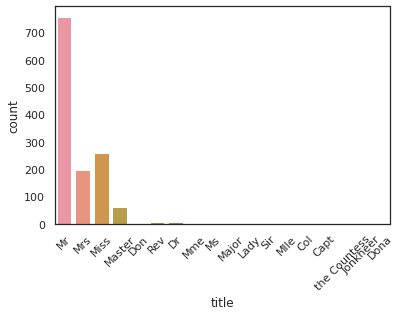

In [34]:
# Getting title out of name
data['title'] = pd.Series([x.split(",")[1].split(".")[0].strip() for x in data["Name"]])
g = sns.countplot(x='title', data=data)
plt.setp(g.get_xticklabels(), rotation=45);

In [35]:
data['title'] = data.title.replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

In [36]:
data['title'] = data['title'].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Other":3})
data['title'] = data['title'].astype(int)

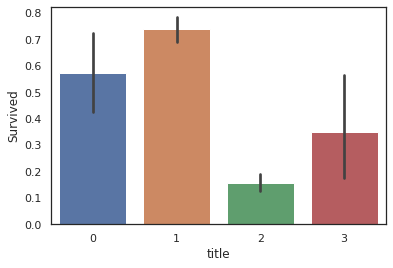

In [37]:
g = sns.barplot(x = 'title', y = 'Survived', data=data)

Women and masters had the highest chances to survive during crash.

In [38]:
data = data.drop(columns=['Name'])

## 2.2. Age

In [39]:
data['is_young'] = 0 
data.loc[data['pred_age'] <= 20, 'is_young'] = 1

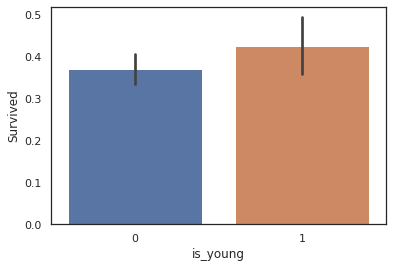

In [40]:
sns.barplot(x='is_young', y='Survived', data=data);

## 2.3. SibSp and Parch

In [41]:
# SibSp and Parch children seem to be correlated, therefore we will unite this variables into new one
data['fam_size'] = 0
data['fam_size'] = data['Parch'] + data['SibSp']

# We will also add is alone variable
data['alone'] = 0
data.loc[data.fam_size == 0, 'alone'] = 1

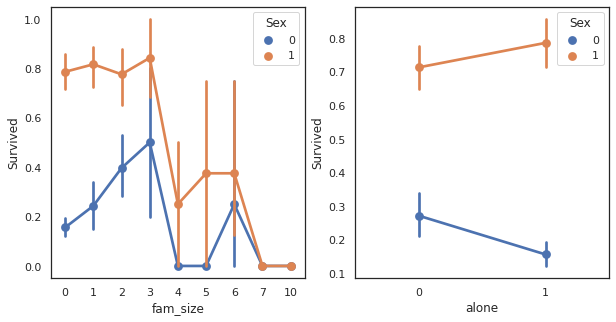

In [42]:
# No of family members & being alone vs. survival rate
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.pointplot(x='fam_size', y='Survived', hue='Sex', data=data, ax=ax[0]);
sns.pointplot(x='alone', y='Survived', hue='Sex', data=data, ax=ax[1]);

In [43]:
# Families with a lot of family members took 3rd class
pd.crosstab(data.fam_size, data.Pclass).style.background_gradient(cmap='Reds')

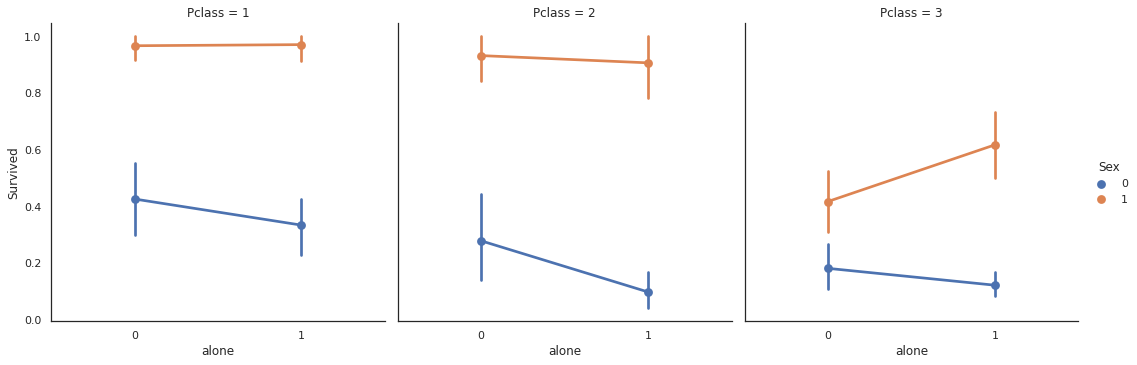

In [44]:
# Being alone vs. Survived vs. Sex vs. Pclass
sns.catplot(x='alone', y='Survived', hue='Sex', data=data, kind='point', col='Pclass');

## 2.4. Ticket

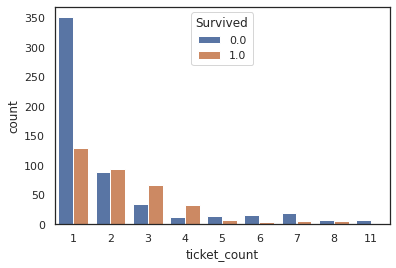

In [45]:
data['ticket_count'] = data.groupby('Ticket')['Ticket'].transform('count')
sns.countplot(x='ticket_count', hue='Survived', data=data);

Predictably, people who were alone on one ticket had less chances of surviving than people in 2-4 groups.

In [46]:
data = data.drop(columns=['Ticket'])

## 2.5. Cabin

In [47]:
data["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in data['Cabin']])

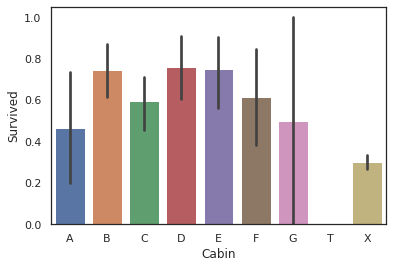

In [48]:
g = sns.barplot(x=data["Cabin"].sort_values(), y=data['Survived'])

In [49]:
data.head()

PassengerId  Survived  Pclass  Sex  SibSp  Parch     Fare Cabin Embarked  \
0            1       0.0       3    0      1      0   7.2500     X        S   
1            2       1.0       1    1      1      0  71.2833     C        C   
2            3       1.0       3    1      0      0   7.9250     X        S   
3            4       1.0       1    1      1      0  53.1000     C        S   
4            5       0.0       3    0      0      0   8.0500     X        S   

   log_fare  pred_age  title  is_young  fam_size  alone  ticket_count  
0  0.860338      22.0      2         0         1      0             1  
1  1.852988      38.0      1         0         1      0             2  
2  0.898999      26.0      1         0         0      1             1  
3  1.725095      35.0      1         0         1      0             2  
4  0.905796      35.0      2         0         0      1             1

## Encoding non-numerical values

In [50]:
from sklearn.preprocessing import LabelEncoder
nonnum=['Embarked', 'Cabin']

for feat in nonnum:
    data[feat] = data[feat].astype('category')
    data[feat] = LabelEncoder().fit_transform(data[feat])

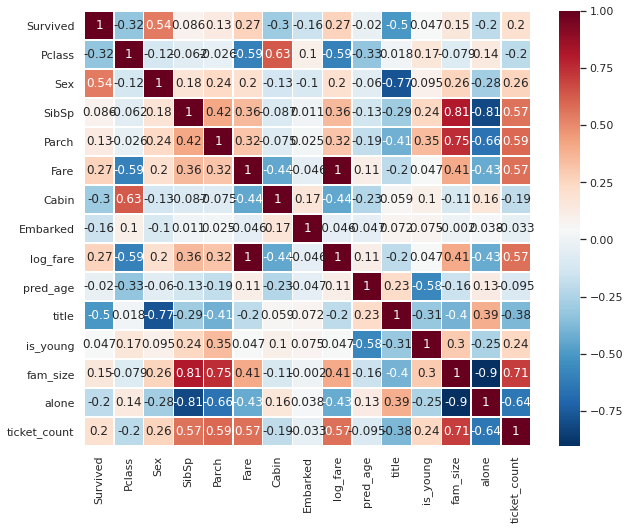

In [51]:
# Correlation matrix
sns.heatmap(data.drop(columns=['PassengerId']).corr("kendall"),annot=True,linewidths=0.4, cmap='RdBu_r');
fig = plt.gcf()
fig.set_size_inches(10,8)

We weill drop highly correlated SibSp, Parch and fam_size and leave ticket_count and alone. We will also get rid of Sex feature, as Title seems to capture differnces better. Also we will clean unnecessary Fare variable, as we log transformed it.

In [52]:
data = data.drop(columns=['SibSp', 'Parch', 'fam_size', 'Sex', 'Fare'])

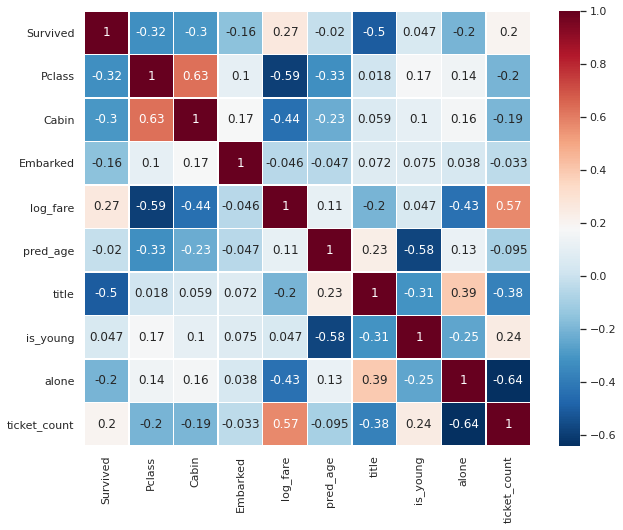

In [53]:
sns.heatmap(data.drop(columns=['PassengerId']).corr("kendall"),annot=True,linewidths=0.4, cmap='RdBu_r');
fig = plt.gcf()
fig.set_size_inches(10,8)

In [54]:
cat_features = ['Pclass', 'Cabin', 'Embarked', 'title']

one_hot = pd.get_dummies(data, columns=cat_features)

In [55]:
train_clean = one_hot[one_hot.PassengerId.isin(train.PassengerId)]
test_clean = one_hot[one_hot.PassengerId.isin(test.PassengerId)]

# 3. Modeling

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import NuSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from mlxtend.classifier import StackingCVClassifier

In [57]:
X = train_clean.drop(['PassengerId', 'Survived'], axis=1)
y = train_clean.Survived.astype('category')

In [58]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=rnd_seed)
X_test = test_clean.drop(['PassengerId', 'Survived'], axis=1)

In [59]:
classifier1 = SVC(C = 50, degree = 1, gamma = "auto", kernel = "rbf", probability = True)
classifier2 = MLPClassifier(activation = "relu", alpha = 0.1, hidden_layer_sizes = (10,10,10),
                            learning_rate = "constant", max_iter = 2000, random_state = rnd_seed)
classifier3 = NuSVC(degree = 1, kernel = "rbf", nu = 0.25, probability = True)
classifier4 = RandomForestClassifier(n_estimators = 500, n_jobs = -1, random_state = rnd_seed)
classifier5 = LogisticRegression()
classifier6 = GradientBoostingClassifier()
classifier7 = AdaBoostClassifier()
classifier8 = KNeighborsClassifier()

In [60]:
classifiers = {"SVC": classifier1,
               "MLP": classifier2,
               "NuSVC": classifier3,
               "RF": classifier4,
               "LR": classifier5,
              "GBC": classifier6,
              "AdaBoost": classifier7,
              "KNC": classifier8}

In [61]:
clf_scores = []

for clf in classifiers.values(): 
    pipe = Pipeline([('scale', PowerTransformer(standardize=True)), ('clf', clf)])
    score = cross_val_score(pipe, X_train, y_train, scoring = "accuracy", n_jobs=-1, cv=5)
    model_name = clf.__class__.__name__.replace('Classifier', '')
    clf_scores.append([model_name, score.mean(), score.std()])

In [62]:
scores = pd.DataFrame(clf_scores, columns=['Model', 'Mean', 'Std'])

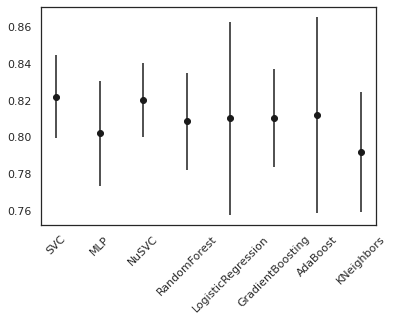

In [63]:
fig, ax = plt.subplots()
ax.errorbar(scores['Model'], scores['Mean'], yerr=scores['Std'], fmt = 'o', color = 'k')
plt.xticks(scores['Model'], rotation=45);

In [64]:
def tune_model(model, param_grid, X=X_train, y=y_train): 
    X_scaled = PowerTransformer(standardize=True).fit_transform(X)
    tuned_model = RandomizedSearchCV(model, param_distributions = param_grid, 
                                     scoring="accuracy", n_iter = 60, n_jobs= -1, cv = 5, 
                                     verbose = 1, refit=True)
    tuned_model.fit(X_scaled, y)
    print(tuned_model.best_score_)
    return tuned_model.best_estimator_

In [75]:
mlp = MLPClassifier(max_iter = 100)

mlp_param_grid = {
    'hidden_layer_sizes': [(6, 7, 2), (5, 6, 2), (4, 4, 2)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

best_mlp = tune_model(mlp, mlp_param_grid)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.3s finished


0.820518207282913


In [87]:
from warnings import filterwarnings
filterwarnings('ignore')

maxiter = [int(x) for x in np.linspace(40, 300, 100)]

train_loss = []
test_loss = []

for i in maxiter:
    mlp = MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(6, 7, 2), learning_rate='adaptive', max_iter=i)
    pipe = Pipeline(([('scaler', PowerTransformer(standardize=True)), ('clf', mlp)]))
    pipe.fit(X_train, y_train)
    
    train_loss.append(1 - pipe.score(X_train, y_train))
    test_loss.append(1 - pipe.score(X_val, y_val))

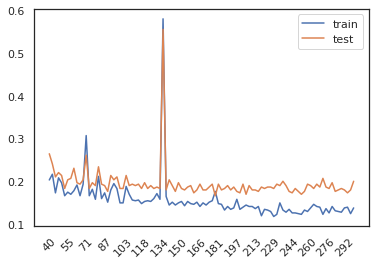

In [88]:
fig, ax = plt.subplots()
ax.plot(train_loss, label='train')
ax.plot(test_loss, label='test')
plt.xticks(ticks=range(0, 100), labels=maxiter, rotation=45)
max_yticks = 20
xloc = plt.MaxNLocator(max_yticks)
ax.xaxis.set_major_locator(xloc)
plt.legend();

In [89]:
maxiter = [int(x) for x in np.linspace(60, 160, 100)]

train_scores = []
test_scores = []

for i in maxiter:
    mlp = MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(6, 7, 2), learning_rate='adaptive', max_iter=i)
    pipe = Pipeline(([('scaler', PowerTransformer(standardize=True)), ('clf', mlp)]))
    pipe.fit(X_train, y_train)
    train_scores.append(pipe.score(X_train, y_train))
    test_scores.append(pipe.score(X_val, y_val))

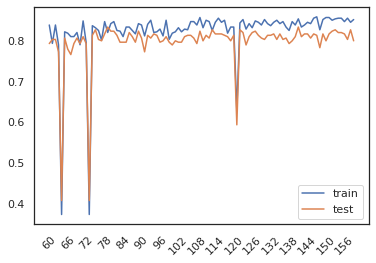

In [90]:
fig, ax = plt.subplots()
ax.plot(train_scores, label='train')
ax.plot(test_scores, label='test')
plt.xticks(ticks=range(0, 100), labels=maxiter, rotation=45)
max_yticks = 20
xloc = plt.MaxNLocator(max_yticks)
ax.xaxis.set_major_locator(xloc)
plt.legend();

In [91]:
MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(6, 7, 2),
              learning_rate='adaptive', max_iter = 115)
pipe = Pipeline(([('scaler', PowerTransformer(standardize=True)), ('clf', mlp)]))
pipe.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))
preds = pipe.predict(X_test)
submission_save(preds, test, submission_folder)

005_submission.csv saved!
